# Pruebas Adaboost + RandomForest

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-38:
- Estimadores de los RandomForest aumentados de 10 a 16

In [5]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [6]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [7]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [8]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [9]:
TEST_SIZE_PERCENT = 0.1
RANDOM_SEED = 12

In [10]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [11]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [12]:
clasificador = AdaBoostClassifier(
    base_estimator = RandomForestClassifier(
        n_estimators=16, 
        criterion='entropy', 
        max_features='sqrt', 
        min_samples_split=100, 
        n_jobs=-1, 
        random_state=RANDOM_SEED, 
        verbose=10
    ),
    n_estimators=15,
    random_state=RANDOM_SEED
)

In [ ]:
clasificador.fit(X_train, y_train)

building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.5s


building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:   18.5s remaining:    8.4s


building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   23.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   25.3s finished
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  11 out of  16 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  13 out of  16 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.0s finished


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16


In [ ]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_test, y_test_predictd)

In [ ]:
clasificador.score(X_test, y_test)

In [ ]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [ ]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

In [ ]:
kaggle_out['sepostulo'].hist()

In [ ]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-40.csv', index=False)

In [ ]:
kaggle_37 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-37.csv')

In [19]:
roc_auc_score(np.round(kaggle_37['sepostulo']), kaggle_out['sepostulo'])

0.9957863005835678

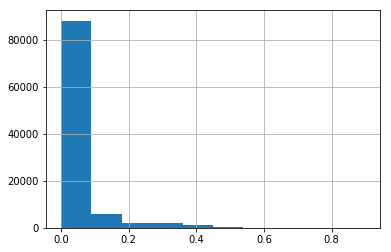

In [22]:
np.abs(kaggle_37['sepostulo'] - kaggle_out['sepostulo']).hist()